# Lagrangian Coherent Structure for SCHISM
[![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.10574263.svg)](https://doi.org/10.5281/zenodo.10574263)


<div class="warning" style='padding:0.1em; background-color:#FFFFFF; color:#000000; border-left: solid #000000 4px; border-radius: 4px; padding:0.7em;'>
<span>
<p style='margin-top:1em; text-align:rigth; margin-left:1em'>
<b>Objective: </b> Calculation the LCSs for a region. </p>
<p style='margin-left:1em;'>
The main objective of this repository is to calculate the climatological LCSs. However, we found that adding the capability of calculating non-climatological LCS was also useful and an easy step given the main base was already written. Moreover we improved the capability and implemented the code to work with non-structured grids such as SCHISM.  
</p>
<p style='margin-left:1em;'>
Feb - 2024 | Mireya M. Montano | mireya.mmor@gmail.com
</p>
<p style='margin-bottom:1em; margin-right:1em; text-align:right; font-family:Georgia'>
</p></span>
</div>


## Extracting Data
For this SCHISM test we are using data provided by Phellipe Couto (check before publishing, there is probably going to be a THREDDS server link as well)

In [1]:
import os
import glob

files = sorted(glob.glob("schism_hist_*"))
dirr = os.getcwd()

### Parameters needed
#### File/environment related parameters
In this section we define the file-environment related parameters. Such as:
- month_or_id: In this case, id of the experiment
- file: path to the file with the velocity fields
- dirr: Working directory where the generated files are going to be saved. In this case we are using the current directory as an example
- vars_dict: Dictionary containing the names associated to the lon, lat and mask variables within the file. ROMS example:
  - {"lon": "lon_rho", "lat": "lat_rho"}
- domain: choosing a zoom-in domain allows to see a better representation of the coastal or higher resolution dynamics. Provide box limits [lonmin, lonmax, latmin, latmax]

In [2]:
id = "test"
dirr = os.getcwd()
climatology = False

vars_dict = {
    "lon": "SCHISM_hgrid_node_x",
    "lat": "SCHISM_hgrid_node_y",
}
# lonmin, lonmax, latmin, latmax indices
domain = [173.4847, 173.7419, -42.5717, -42.3955]

xarray example of data

In [3]:
import xarray as xr

ds = xr.open_dataset(files[0])

ds

<xarray.Dataset>
Dimensions:                  (time: 24, one: 1, nSCHISM_hgrid_face: 235389,
                              nMaxSCHISM_hgrid_face_nodes: 4,
                              nSCHISM_hgrid_edge: 355886, two: 2,
                              nSCHISM_hgrid_node: 120498, sigma: 2,
                              nSCHISM_vgrid_layers: 2)
Coordinates:
  * time                     (time) datetime64[ns] 2016-01-01T01:00:00 ... 20...
  * sigma                    (sigma) float32 -1.0 0.0
Dimensions without coordinates: one, nSCHISM_hgrid_face,
                                nMaxSCHISM_hgrid_face_nodes,
                                nSCHISM_hgrid_edge, two, nSCHISM_hgrid_node,
                                nSCHISM_vgrid_layers
Data variables: (12/34)
    SCHISM_hgrid             (one) int32 ...
    SCHISM_hgrid_face_nodes  (nSCHISM_hgrid_face, nMaxSCHISM_hgrid_face_nodes) float64 ...
    SCHISM_hgrid_edge_nodes  (nSCHISM_hgrid_edge, two) int32 ...
    SCHISM_hgrid_node_x      (nSCHISM_hgrid_node) float32 ...
    SCHISM_hgrid_node_y      (nSCHISM_hgrid_node) float32 ...
    node_bottom_index        (nSCHISM_hgrid_node) int32 ...
    ...                       ...
    salt                     (time, nSCHISM_hgrid_node, nSCHISM_vgrid_layers) float32 ...
    diffusivity              (time, nSCHISM_hgrid_node, nSCHISM_vgrid_layers) float32 ...
    viscosity                (time, nSCHISM_hgrid_node, nSCHISM_vgrid_layers) float32 ...
    TKE                      (time, nSCHISM_hgrid_node, nSCHISM_vgrid_layers) float32 ...
    mixing_length            (time, nSCHISM_hgrid_node, nSCHISM_vgrid_layers) float32 ...
    hvel                     (time, nSCHISM_hgrid_node, nSCHISM_vgrid_layers, two) float32 ...
Attributes:
    Conventions:   CF-1.0, UGRID-1.0
    title:         SCHISM Model output
    institution:   SCHISM Model output
    source:        SCHISM model output version v10
    references:    http://ccrm.vims.edu/schismweb/
    history:       created by combine_output11
    comment:       SCHISM Model output
    type:          SCHISM Model output
    VisIT_plugin:  https://schism.water.ca.gov/library/-/document_library/vie...

#### Particle release and OpenDrift configuration parameters

In this portion we define the particle release and Opendrfit configuration related parameters. 

Particle release:
- dx (int): Spacing between particles on the x-axis in km. Default: 1 km
- dy (int): Spacing between particles on the y-axis in km. Default 1 km 
- T (int): Timescale to use, use negative timescale if a backward in time simulation is needed
- dt (int): Particle release time step in seconds. Default 6*3600 
- time_step_output (int): If the output of the trajectories is required this will define the output time step in seconds. Default 86400
- z (int): Depth of releases. The cLCS are calculated on the surface therefore the value is 0 however this analyses can potentially be done at different depths. 

For climatological LCS the user should use as much releases through the month as possible. However, to estimate non-climatological LCSs (single release) a release time must be provided. 
- start_release (pd.datetime): User can define at what point in time releases should start. This start release should be included in the files provided.

Parameters not needed for non-climatological LCSs
- frequency_of_deployments (int): how often are particle releases made in days.

In [4]:
T = -3  # days
dx = 0.05  # km
dy = 0.05  # km
dt = 900  # seconds
time_step_output = 3600 * 3  # seconds
frequency_of_deployments = None  # days
z = 0  # meters

from datetime import datetime

start_release = [datetime(2016, 1, 4)]



OpenDrift configuration:
- opendrift_reader (str): Reader for the files, see OpenDrift for more information. In this example we use "reader_ROMS_native_MOANA"
- opendrift_model (str): OpenDrift module to use. In this example we use "OceanDrift"
- log_level (int): Logging information for Opendrfit. 50 - No information, 20 For a certain amount, 0 for all the debugging
- max_speed (int): maximum speed particles are allowed to reach in m/s. Default 5
- horizontal_diffusivity (int): Particle release horizontal diffusivity. Default: 0.1
- advection_scheme (str): advection scheme of the particle release. Default: "runge-kutta4"

In [5]:
opendrift_reader = "reader_schism_native"
opendrift_model = "OceanDrift"
log_level = 20  # 50 For no logging information, 20 For a certain amount, 0 for all the debugging
max_speed = 5
horizontal_diffusivity = 0
advection_scheme = "runge-kutta4"

#### OpenDrift releases and calculation of the Cauchy-Green Tensors.

This class returns a file containing the accumulated values associated with the calculation of the Cauchy-Green Tensors for each run of the chosen month. It can also return a file containing the calculated particle trajectories and the daily Cauchy-Green Tensor estimates,     save_trajectories=True and save_daily_CG=True respectively. 

<div class="warning" style='padding:0.1em; background-color:#FFFFFF; color:#69337A; border-left: solid #805AD5 4px; border-radius: 4px; padding:0.7em;'>
<span>
<p style='margin-top:1em; text-align:rigth; margin-left:1em'>
<b>Note</b></p>
<p style='margin-left:1em;'>
The duration of the run depends on the size of the grid. For example, for a 315x400 grid. Each release takes about a minute (~115.5K particles per release, 22 to 24 releases per month). Therefore the calculation for each month varies between 25 to 30 minutes. For a 229x113, this process takes 5 minutes. However once it is run and the TOT-%m.p pickle file is saved there is no need to re-run the particle simulation.  
</p>
<p style='margin-bottom:1em; margin-right:1em; text-align:right; font-family:Georgia'>
</p></span>
</div>


In [6]:
from cLCS.mean_C import mean_CG


CG = mean_CG(
    dirr,
    files,
    id,
    climatology,
    domain,
    dx,
    dy,
    T,
    dt,
    frequency_of_deployments,
    time_step_output,
    z,
    opendrift_reader,
    opendrift_model,
    vars_dict,
    log_level,
    max_speed,
    horizontal_diffusivity,
    advection_scheme,
    save_trajectories=True,
    save_daily_CG=False,
    start_release=start_release,
)

CG.run()

INFO:root:--- Creating output directory
INFO:opendrift.readers.reader_schism_native:Opening dataset: ['schism_hist_kaikoura-2d_v0_20160101.nc', 'schism_hist_kaikoura-2d_v0_20160102.nc', 'schism_hist_kaikoura-2d_v0_20160103.nc', 'schism_hist_kaikoura-2d_v0_20160104.nc', 'schism_hist_kaikoura-2d_v0_20160105.nc', 'schism_hist_kaikoura-2d_v0_20160106.nc', 'schism_hist_kaikoura-2d_v0_20160107.nc', 'schism_hist_kaikoura-2d_v0_20160108.nc', 'schism_hist_kaikoura-2d_v0_20160109.nc']
INFO:opendrift.readers.reader_schism_native:Opening files with open_mfdataset
INFO:root:--- 2016-01-04 00:00:00 Release


--- 2016-01-04 00:00:00 Release 1/1


22:17:04 INFO    opendrift.models.basemodel:538: OpenDriftSimulation initialised (version 1.10.6 / v1.0.1-3263-gdb922eb)
22:17:04 INFO    opendrift.readers.reader_schism_native:181: Opening dataset: ['schism_hist_kaikoura-2d_v0_20160101.nc', 'schism_hist_kaikoura-2d_v0_20160102.nc', 'schism_hist_kaikoura-2d_v0_20160103.nc', 'schism_hist_kaikoura-2d_v0_20160104.nc', 'schism_hist_kaikoura-2d_v0_20160105.nc', 'schism_hist_kaikoura-2d_v0_20160106.nc', 'schism_hist_kaikoura-2d_v0_20160107.nc', 'schism_hist_kaikoura-2d_v0_20160108.nc', 'schism_hist_kaikoura-2d_v0_20160109.nc']
22:17:04 INFO    opendrift.readers.reader_schism_native:183: Opening files with open_mfdataset
22:17:10 INFO    opendrift.models.oceandrift:336: Setting config: drift:vertical_advection -> False
22:17:10 INFO    opendrift.models.oceandrift:336: Setting config: drift:vertical_mixing -> False
22:17:11 INFO    opendrift.models.basemodel:2587: Fallback values will be used for the following variables which have no readers: 

--- Obtaining the final position of particles


22:24:14 INFO    root:286: --- Calculating the Cauchy-Green Tensor
22:24:14 WARNING py.warnings:109: /Users/mireyamontano/Documents/PhD/cLCS/cLCS/mean_C.py:301: RuntimeWarning: divide by zero encountered in log
  ftle = np.log(lda2) / (2 * np.abs(self.T))



--- Calculating Cauchy-Green Tensor
Calculation of climatological LCS done for test


#### Squeezelines computation
Using the Cauchy-green calculations this portion of the code computes the squeezelines which are a function of (X,Y)

This code integrates line field from 0 to arclength.

Suggestion: arclength = 150

The output of this class is a file cLCS_%m.p containing the squeezelines (X,Y). Once this file is created there is no need to repeat the process to visualise the cLCSs

In [9]:
from cLCS.make_cLCS import compute_cLCS_squeezelines

squeezelines = compute_cLCS_squeezelines(
    f"{dirr}/", id, arclength=150, climatology=False
)

squeezelines.run()


<div class="warning" style='padding:0.1em; background-color:#FFFFFF; color:#E49B0F; border-left: solid #FDDA0D 4px; border-radius: 4px; padding:0.7em;'>
<span>
<p style='margin-top:1em; text-align:rigth; margin-left:1em'>
<b>Note</b></p>
<p style='margin-left:1em;'>
If not interested in the climatological aspect aka the averaging define climatology=False to obtain the squeezelines for each Cauchy-Green Tensor available in the folder.
</p></span>
</div>

In [10]:
import numpy as np

PX, PY = np.load(f"{dirr}/{id}/LCS_test04.p", "rb", allow_pickle=True)

print(
    f"This dataset has {PX.shape[0]} squeezelines with {PX.shape[1]} segments each")

This dataset has 578 squeezelines with 150 segments each


#### Visualisation of cLCSs

This section plots the coloured lines of cLCSs returns the fig and ax object. 

Again the working directory and the month being analysed has to be provided. 

Other parameters that can be defined are:
- colourmap (str): Colourmap must be provided, you can chose from one of the options provided on the [README file](https://github.com/MireyaMMO/cLCS/blob/main/README.md#additional-info), or just use a pyplot colormap string.
- lw (int): linewidth. Default 0.8
- fig and/or ax (object): in case the plan is to make a subplot these figures if not a new figure and ax will be created. 
- projection: cartopy associated projection 
- line_spacing (int): to plot every other line (Default: 4)
- save_fig (str): If you want to save the generated figure define the format in which you need the figure (i.e., pdf,svg,png). Default: None 
- corners: if not defined, the script will identify the corners of the domain. [lonmin, lonmax, latmin, latmax]

<!-- <div class="warning" style='padding:0.1em; background-color:#FFFFFF; color:#F28C28; border-left: solid #C04000 4px; border-radius: 4px; padding:0.7em;'>
<span>
<p style='margin-top:1em; text-align:rigth; margin-left:1em'>
<b>Note</b></p>
<p style='margin-left:1em;'>
It is a slow code as it segments each portion of the line to identify the intensity of the LCS in that segment. This is a process that is applied to each line as well. This example has 590 squeezelines with 150 segments each line.  
</p>
<p style='margin-left:1em;'>
This can probably be improved.
</p>
<p style='margin-bottom:1em; margin-right:1em; text-align:right; font-family:Georgia'>
</p></span>
</div> -->


If only a quick visualisation is needed or the intensity of the cLCS is not relevant there is a faster monochrome option available.

Parameters:
- dirr (str): directory where all the outputs are being saved
- month (int): month that is being analysed 
- fig, ax (object)
- color (str): color requested. Default: 'black'
- alpha (int): as in matplotlib if transparency is needed. Default: 1
- lw (int): linewidth. Default: 0.8
- projection: cartopy associated projection
- line_spacing (int): to make process faster just plot every other line. Default: 1
- save_fig (str): If you want to save the generated figure define the format in which you need the figure (i.e., pdf,svg,png). Default: None (no figure saved). 
- corners: if not defined, the script will identify the corners of the domain. [lonmin, lonmax, latmin, latmax]

<div class="warning" style='padding:0.1em; background-color:#FFFFFF; color:#E37383; border-left: solid #9F2B68 4px; border-radius: 4px; padding:0.7em;'>
<span>
<p style='margin-top:1em; text-align:rigth; margin-left:1em'>
<b>Note</b></p>
<p style='margin-left:1em;'>
To plot non-climatological LCS define climatology=False and provide the files containing the Cauchy Green Tensor and the squeezelines, as seen in example below
</p></span>
</div>

---- Generating figure with cartopy features
---- High-resolution Cartopy features added
---- Squeezeline and associated data loaded
---- Saving Figure
---- Done


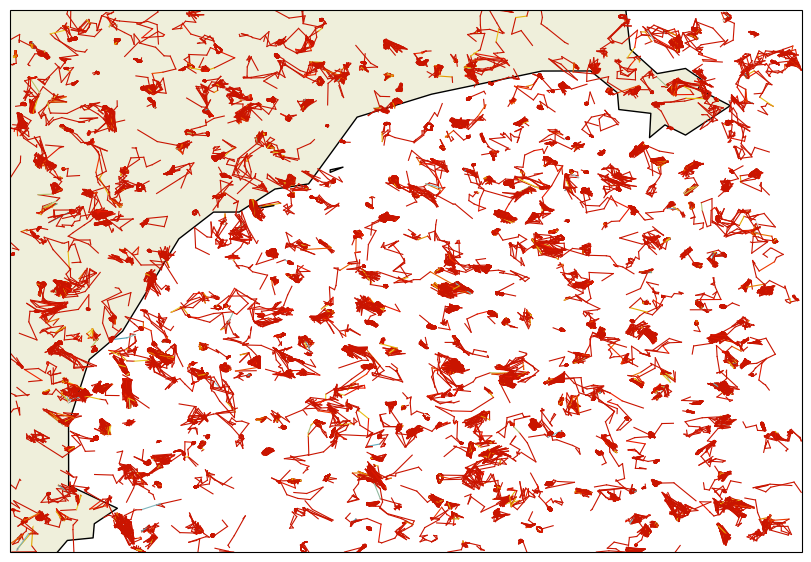

In [11]:
from cLCS.plotting_cLCS import *

fig, ax = cLCSrho_cartopy_colour(
    dirr,
    id,
    colourmap="Zissou",
    fig=None,
    ax=None,
    projection=ccrs.PlateCarree(),
    line_spacing=1,
    save_fig="png",
    corners=domain,
    climatology=False,
    squeezelines_file=f"{dirr}/{id}/LCS_{id}04.p",
    CG_file=f"{dirr}/{id}/LCS_{id}04-CG.p",
)

---- Generating figure with cartopy features
---- High-resolution Cartopy features added
---- Saving Figure
---- Done


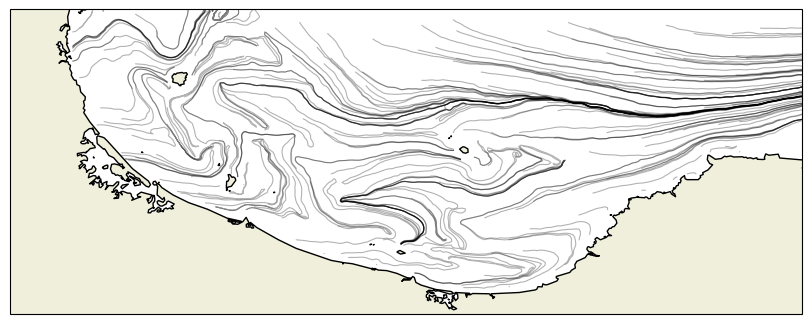

In [7]:
fig, ax = cLCSrho_cartopy_monochrome(
    dirr,
    id,
    fig=None,
    ax=None,
    color="k",
    alpha=0.3,
    lw=0.8,
    line_spacing=2,
    projection=ccrs.PlateCarree(central_longitude=180),
    save_fig="png",
    corners=domain,
    climatology=False,
    squeezelines_file=f"{dirr}/{id}/LCS_0108.p",
    CG_file=f"{dirr}/{id}/LCS_0108-CG.p",
)

### Additional notes
<div class="warning" style='padding:0.1em; background-color:#FFFFFF; color:#009E60; border-left: solid #097969 4px; border-radius: 4px; padding:0.7em;'>
<span>
<p style='margin-top:1em; text-align:rigth; margin-left:1em'>
<b>Note</b></p>
<p style='margin-left:1em;'>
It is important to remark that each study region and application of cLCS is different and question-dependant so tests with different parameters are recommended to assess the best configuration. For this study we had a 27-year hindcast of a coastal region and we were interested in looking into the persistent patterns on the coastal region. 
</p>
<p style='margin-left:1em;'>

To check cLCSs studies worldwide https://oceanresearch.xyz/clcs-ciam-users-worldwide/ :
</p>
<p style='margin-left:1em;'>

- Duran, R., Beron-Vera, F.J. & Olascoaga, M.J. Extracting quasi-steady Lagrangian transport patterns from the ocean circulation: An application to the Gulf of Mexico. Sci Rep 8, 5218 (2018). https://doi.org/10.1038/s41598-018-23121-y 
- Gough, M. K., Beron-Vera, F. J., Olascoaga, M. J., Sheinbaum, J., Jouanno, J., and Duran, R. (2019). Persistent Lagrangian Transport Patterns in the Northwestern Gulf of Mexico. Journal of Physical Oceanography, 49 (2), 353–367. https://doi.org/10.1175/JPO-D-17-0207.1 
- Gouveia, M.B., Duran, R., Lorenzzetti, J.A. et al. Persistent meanders and eddies lead to quasi-steady Lagrangian transport patterns in a weak western boundary current. Sci Rep 11, 497 (2021). https://doi.org/10.1038/s41598-020-79386-9 
- Maslo, A., Azevedo Correia de Souza, J. M., Andrade-Canto, F., and Rodríguez Outerelo, J. (2020). Connectivity of deep waters in the Gulf of Mexico. Journal of Marine Systems, 203, 103267. https://doi.org/10.1016/j.jmarsys.2019.103267 
- https://oceanresearch.xyz/clcs-ciam-users-worldwide/
</p>
<p style='margin-bottom:1em; margin-right:1em; text-align:right; font-family:Georgia'>
</p></span>
</div>
